# Predict house pricing using advanced regression

### Predict the price of a house based on the dataset from Kaggle


## Data Preparation
+ Missing values
+ Categorical variables
+ Numeric variables
+ Ranking variables
+ Feature engineering
+ Correlation
+ Selecting the best variable

## Modeling
+ Combine data (train and test)
+ Clean and fill in missing values
+ Separate train and test dataset
+ Split the training dataset into train and test
+ Train model and test
+ Use Gradient Boosting and Random forest regressors
+ Mean absolute error or mean square error
+ Predict on actual Kaggle test dataset

In [1]:
import pandas as pd
import seaborn as sns
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#!pip install xgboost
import datetime


In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
df1.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
933,934,20,RL,63.0,8487,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,190000


In [4]:
df2.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
523,1984,160,RL,36.0,2448,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal


In [5]:
df=pd.concat([df1,df2]) #iki datayı birlştir.

In [6]:
df.shape

(2919, 81)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
df['GrLivArea'].mean()+3*df['GrLivArea'].std() 

np.float64(3018.912984618467)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [10]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


In [11]:
df.shape

(2919, 81)

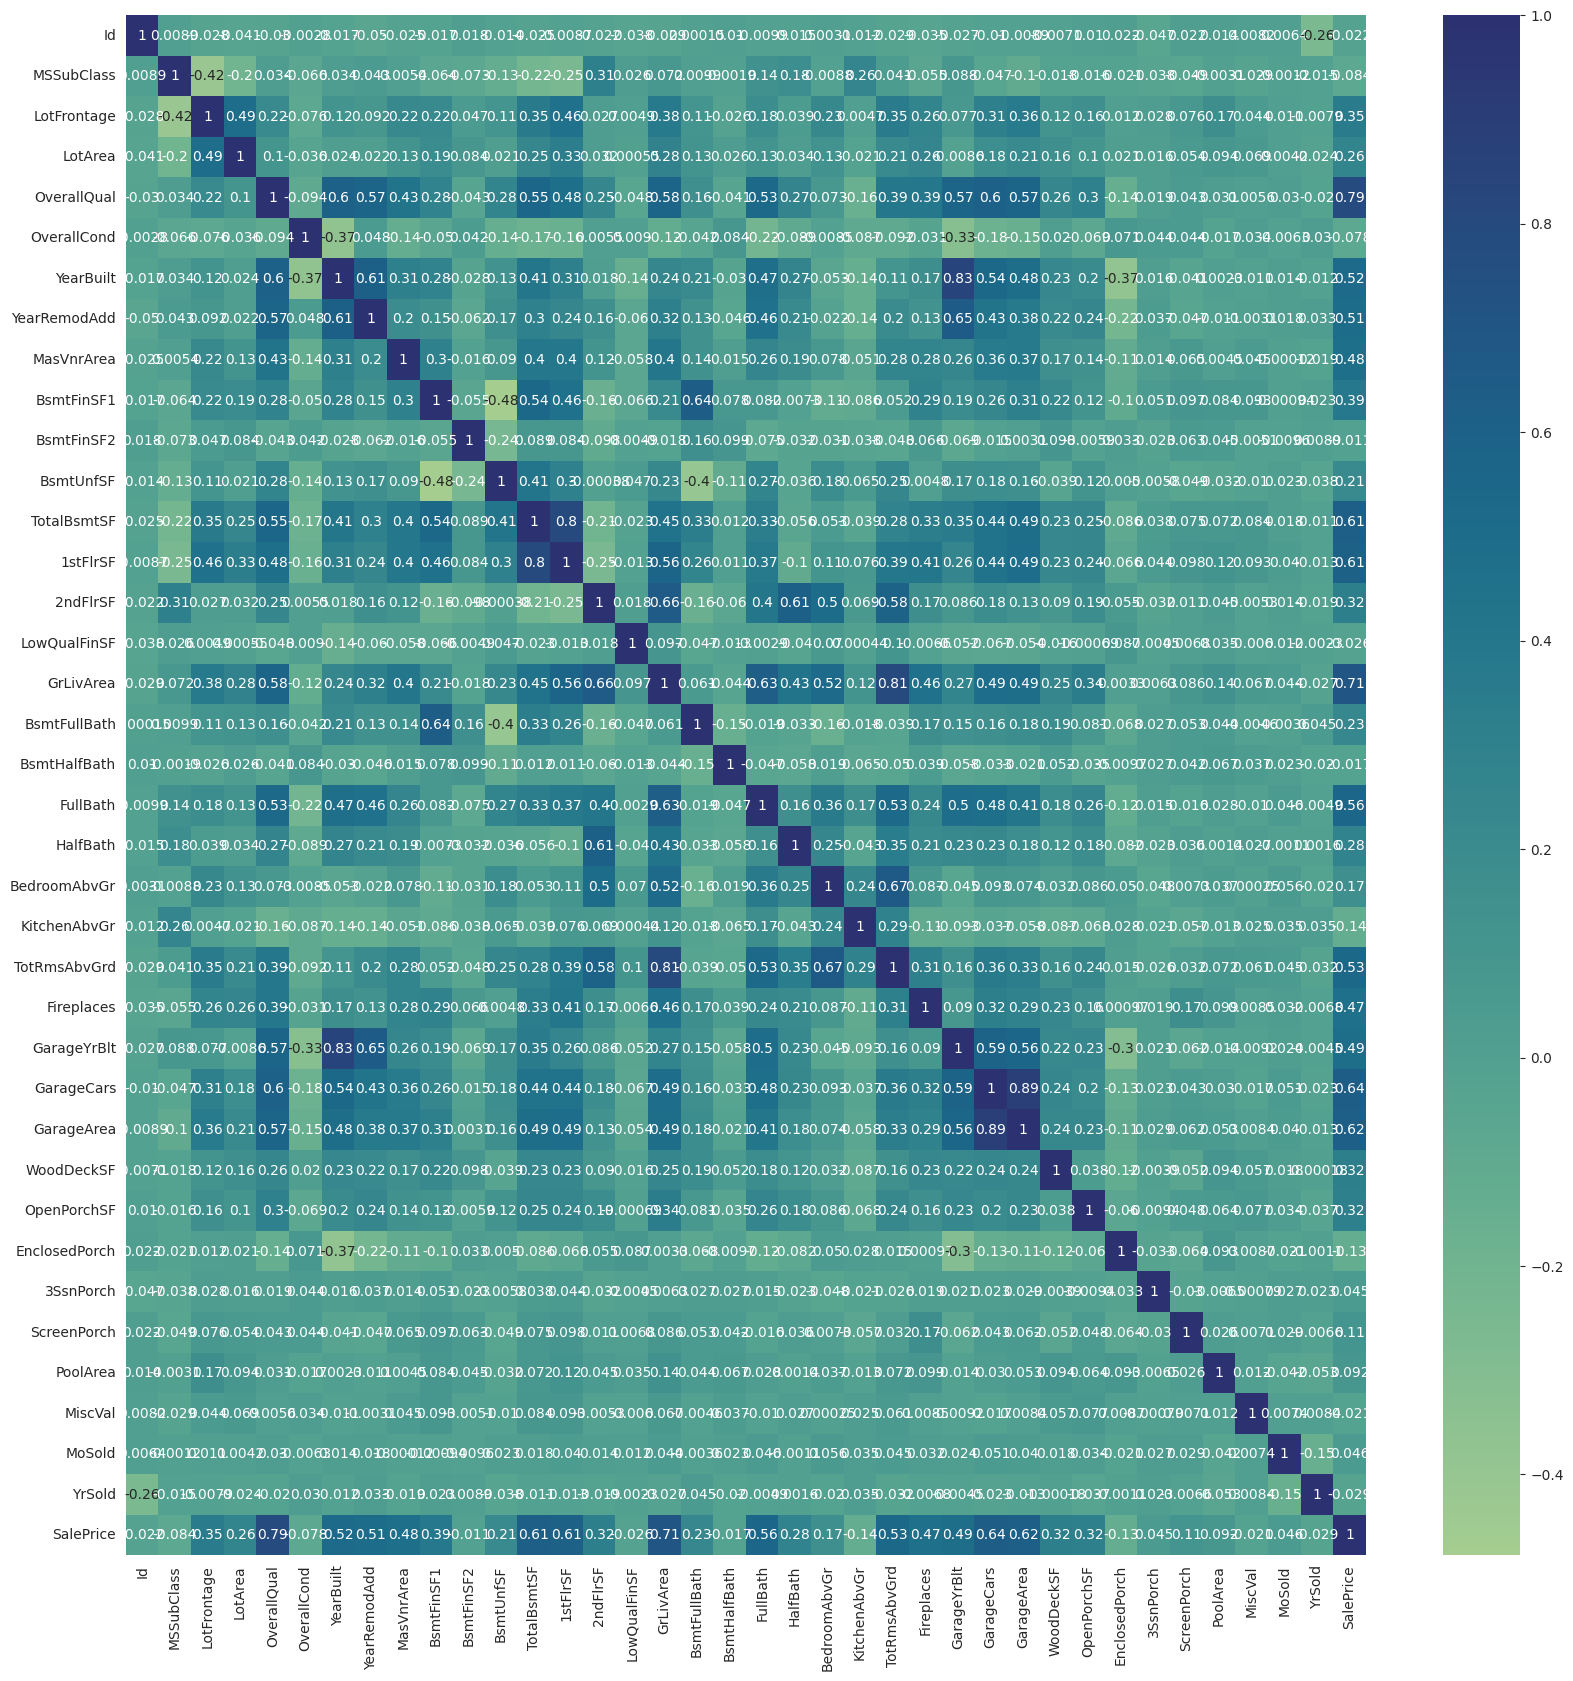

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest');

In [13]:
abs(df.corr(numeric_only=True)['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

<Axes: xlabel='OverallQual'>

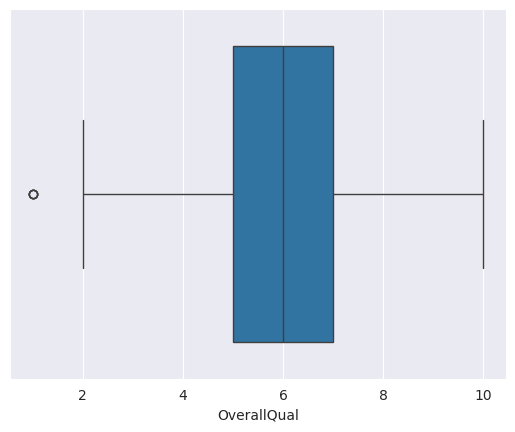

In [14]:
sns.boxplot(x=df['OverallQual'])

<Axes: xlabel='GrLivArea'>

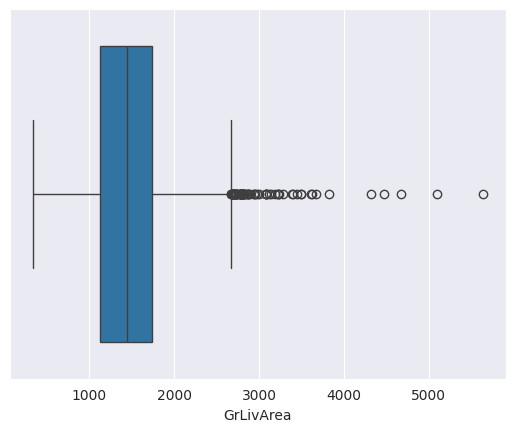

In [15]:
sns.boxplot(x=df['GrLivArea'])

<Axes: xlabel='OverallQual', ylabel='Count'>

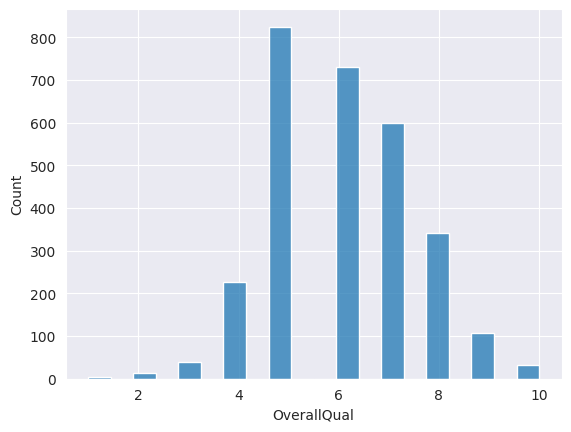

In [16]:
sns.histplot(x=(df['OverallQual']),bins=20)

In [17]:
outliers=df.quantile(q=.97,numeric_only=True)

In [18]:
df.shape

(2919, 81)

In [19]:
df=df[(df['SalePrice']<outliers['SalePrice'])]
df=df[(df['OverallQual']<outliers['OverallQual'])]
df=df[(df['GrLivArea']<outliers['GrLivArea'])]
df=df[(df['GarageCars']<outliers['GarageCars'])]

<Axes: xlabel='SalePrice', ylabel='Count'>

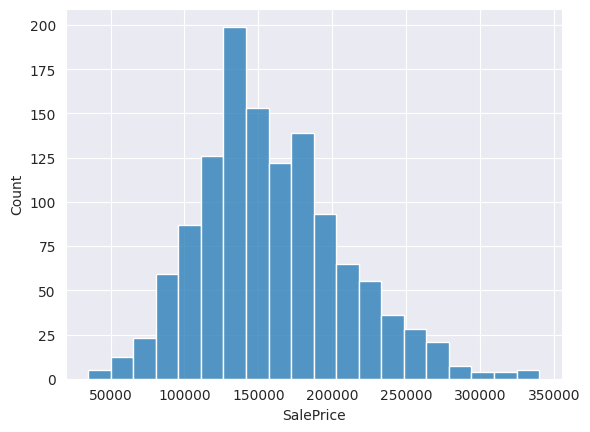

In [20]:
sns.histplot(x=(df['SalePrice']),bins=20)

# Feature Engineering

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1243 non-null   int64  
 1   MSSubClass     1243 non-null   int64  
 2   MSZoning       1243 non-null   object 
 3   LotFrontage    1003 non-null   float64
 4   LotArea        1243 non-null   int64  
 5   Street         1243 non-null   object 
 6   Alley          84 non-null     object 
 7   LotShape       1243 non-null   object 
 8   LandContour    1243 non-null   object 
 9   Utilities      1243 non-null   object 
 10  LotConfig      1243 non-null   object 
 11  LandSlope      1243 non-null   object 
 12  Neighborhood   1243 non-null   object 
 13  Condition1     1243 non-null   object 
 14  Condition2     1243 non-null   object 
 15  BldgType       1243 non-null   object 
 16  HouseStyle     1243 non-null   object 
 17  OverallQual    1243 non-null   int64  
 18  OverallCond  

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0


In [23]:
df['OverallQual']=df['OverallQual']**2  

In [24]:
df['GrLivArea'] = df['GrLivArea'] ** 2  

In [25]:
df['GarageCars'] = df['GarageCars'] ** 2  

In [26]:
import datetime

In [27]:
df['age']= datetime.datetime.now().year-df['YearBuilt']

In [28]:
df.head(2000)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,21
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,48
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,23
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,31
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0,25
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0,46
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0,83
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0,74


In [29]:
numeric_cols = df.select_dtypes(include='number').columns

In [30]:
abs_corr = abs(df[numeric_cols].corr()['SalePrice']).sort_values(ascending=False)
print(abs_corr)

SalePrice        1.000000
OverallQual      0.737195
GrLivArea        0.636449
GarageCars       0.557083
age              0.547290
YearBuilt        0.547290
FullBath         0.545557
GarageArea       0.527251
TotalBsmtSF      0.522205
YearRemodAdd     0.500256
1stFlrSF         0.487450
GarageYrBlt      0.459440
Fireplaces       0.438731
TotRmsAbvGrd     0.407001
BsmtFinSF1       0.324989
HalfBath         0.314331
2ndFlrSF         0.307318
OpenPorchSF      0.303827
LotArea          0.278177
WoodDeckSF       0.275993
LotFrontage      0.264260
MasVnrArea       0.245298
BsmtFullBath     0.214258
BedroomAbvGr     0.169324
EnclosedPorch    0.145399
BsmtUnfSF        0.141986
KitchenAbvGr     0.141773
ScreenPorch      0.137774
LowQualFinSF     0.084438
3SsnPorch        0.080938
PoolArea         0.053135
MoSold           0.032757
BsmtFinSF2       0.027811
MSSubClass       0.022145
YrSold           0.014590
Id               0.007037
BsmtHalfBath     0.006832
MiscVal          0.003036
OverallCond 

In [31]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [32]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,21
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,48
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,23
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,31
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,20


In [33]:
nan_cols = df.columns[df.isna().any()]

In [34]:
nan_cols

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [35]:
df = df.fillna(df.mode().iloc[0])

In [36]:
x=df.drop(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature','SalePrice'
],axis=1)
y=df['SalePrice']

In [37]:
x=pd.get_dummies(x,drop_first=True)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
tahmin=lr.predict(x_test)

In [43]:
r2_score(y_test,tahmin)

0.8884032394176595

In [44]:
mean_squared_error(y_test,tahmin)**.5

np.float64(17707.238516709356)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def algo_test(x, y):
    # Modelleri tanımlıyorum
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    sgd = SGDRegressor()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    rkn = RadiusNeighborsRegressor(radius=1.0)
    ada = AdaBoostRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    svr = SVR()
    mlp_regressor = MLPRegressor()

    algos = [L, R, Lass, E, sgd, ETR, GBR, ada, kn, dt, xgb, svr, mlp_regressor]
    algo_names = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SGD', 'Extra Tree', 'Gradient Boosting',
                  'KNeighborsRegressor', 'AdaBoost', 'Decision Tree', 'XGBRegressor', 'SVR', 'MLP Regressor']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    r_squared = []
    rmse = []
    mae = []

    # Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p)**0.5)
        mae.append(mean_absolute_error(y_test, p))

    # result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae

    # Sonuçları 4 ondalık basamak ile biçimlendir
    result = result.applymap(lambda x: f"{x:.4f}")

    # Oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
    rtable = result.sort_values('R_Squared', ascending=False)
    return rtable

In [46]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Ridge,0.8919,17430.3986,12499.6605
Lasso,0.8889,17667.7894,12819.2644
Linear,0.8884,17707.2385,12877.6347
Gradient Boosting,0.8641,19538.1768,14097.9529
ElasticNet,0.8510,20462.3252,14404.4605
XGBRegressor,0.8334,21635.9852,15460.0602
KNeighborsRegressor,0.7771,25023.5842,19105.0870
Decision Tree,0.6320,32154.2059,23358.1566
Extra Tree,0.5774,34456.9247,25357.6104
MLP Regressor,0.5711,34714.3267,25684.4420


In [47]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [48]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [49]:
Rmodel=R.fit(x_train,y_train)

In [50]:
tahmin2=Rmodel.predict(x_test)

In [51]:
mean_squared_error(y_test,tahmin2)**0.5 #Root Mean Squared Error Hata

np.float64(17430.398633048284)

In [52]:
r2_score(y_test,tahmin2)

0.8918654312333072

In [53]:
y_pred = np.floor(R.predict(x_test))

In [55]:
submission = pd.DataFrame({'Id': x_test['Id'], 'SalePrice': y_pred})

In [56]:
submission

,Id,SalePrice
1055,1056,167111.0
1171,1172,165594.0
793,794,245569.0
732,733,226631.0
1084,1085,177003.0
...,...,...
1077,1078,132993.0
1203,1204,205298.0
359,360,284804.0
708,709,184974.0


In [57]:
submission.to_csv('submission.csv', index=False)